## EGT207 Machine Learning Project

In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load the parkinson dataset

CWD = os.getcwd()
print(CWD)
DIR_DATASET = os.path.join(CWD, 'parkinson_disease_assignment - Copy.csv')
print(DIR_DATASET)

parkinson_df = pd.read_csv(os.path.join(DIR_DATASET))
parkinson_df

/Users/saikeerthan/NYP-AI/ML/Project
/Users/saikeerthan/NYP-AI/ML/Project/parkinson_disease_assignment - Copy.csv


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,DCAT
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,N
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,L
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,M
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,M
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,L
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,L
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,J
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,L


### Data Preparation

#### Data Cleaning

In [3]:
#do data cleaning

#check for size of the dataset
print(f"The size of the Parkinson Dataframe before cleaning is {parkinson_df.size}")


The size of the Parkinson Dataframe before cleaning is 4875


In [4]:
#check for missing values

parkinson_missing = parkinson_df.isnull().sum().sum()
print(f"The number of missing values in the Parkinson DataFrame before cleaning is {parkinson_missing}")

#since there are 7 missing values in the parkinson dataframe, we should remove them 
parkinson_df = parkinson_df.dropna()
parkinson_df



The number of missing values in the Parkinson DataFrame before cleaning is 7


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,DCAT
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,N
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,L
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,M
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,M
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,L
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,L
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,J
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,L


In [5]:
#check for duplicated values 

parkinson_duplicated = parkinson_df[parkinson_df.duplicated()].shape[0]
parkinson_duplicated

print(f"The number of duplicated entries in the parkinson dataframe is {parkinson_duplicated}")

The number of duplicated entries in the parkinson dataframe is 0


In [6]:
#creating a text edit file where the meaning of the colunns are written. Meanings derived from google search. 

cols = parkinson_df.columns

with open('/Users/saikeerthan/NYP-AI/ML/Project/column_descriptions.txt', 'w') as f:
    for column in cols:
        f.write(f"{column} = \n")

f.close()

##### Detecting Outliers

Outliers detected at indices: Index([152, 102, 100, 146, 149, 148,  99, 150, 147, 157, 101,  91,  98, 192,
        97, 193,  63,  88,  17,  90,  89,  65,   4, 141, 170, 167, 115, 166,
        64,  46,  45,  44,  43,  42, 187, 186, 169],
      dtype='int64')


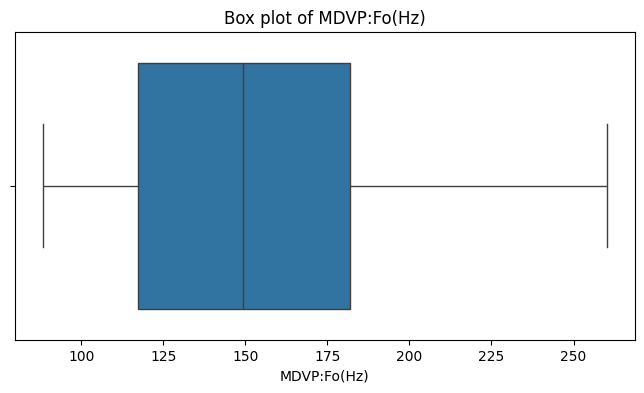

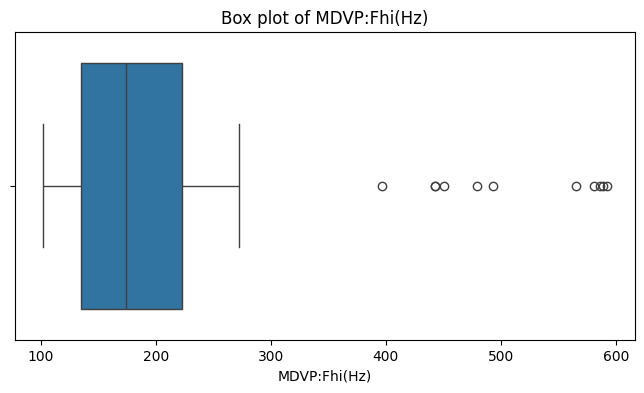

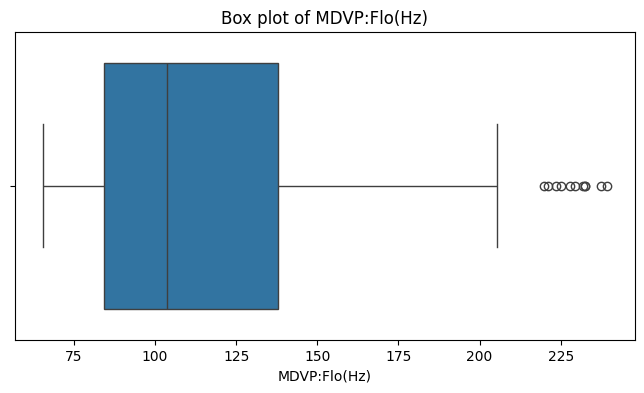

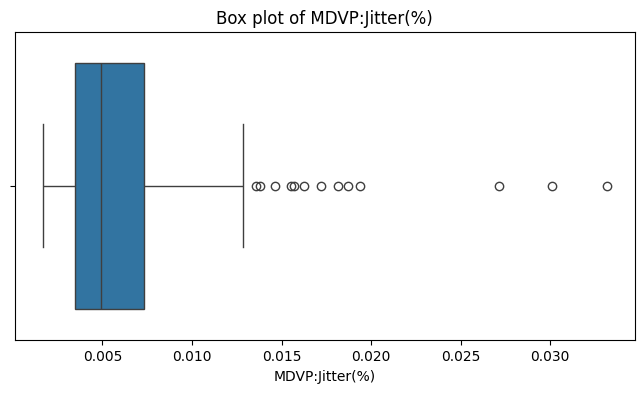

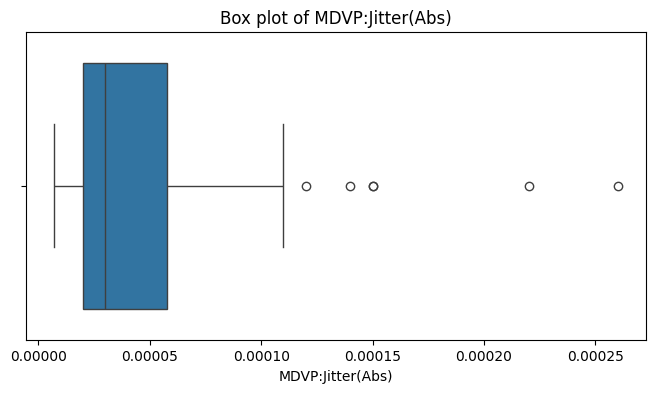

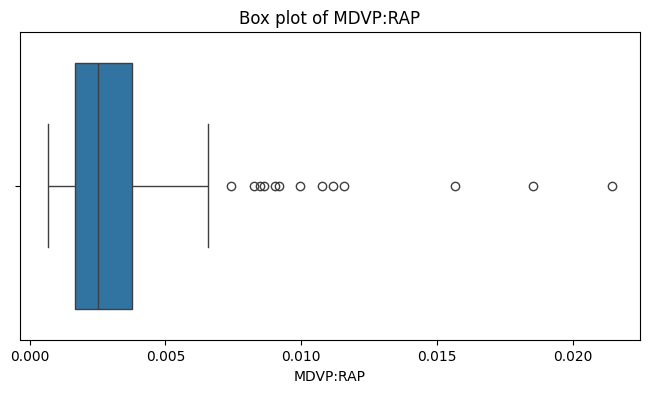

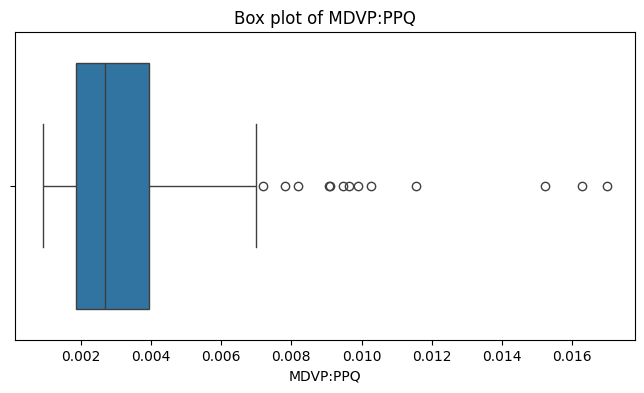

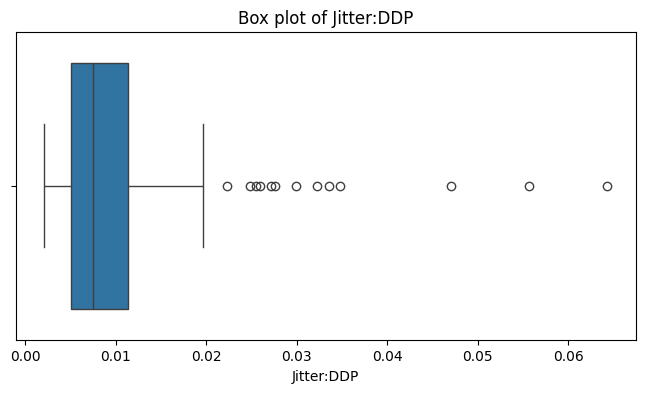

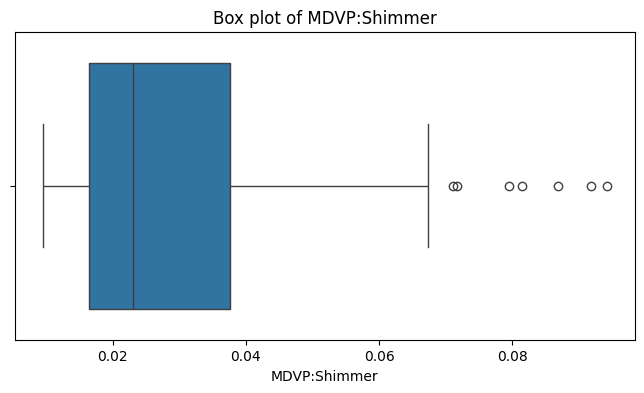

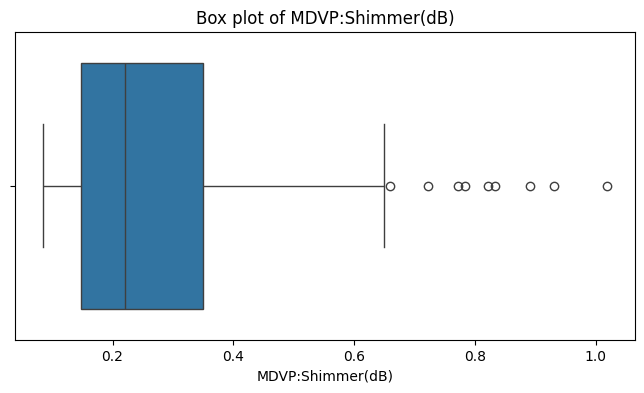

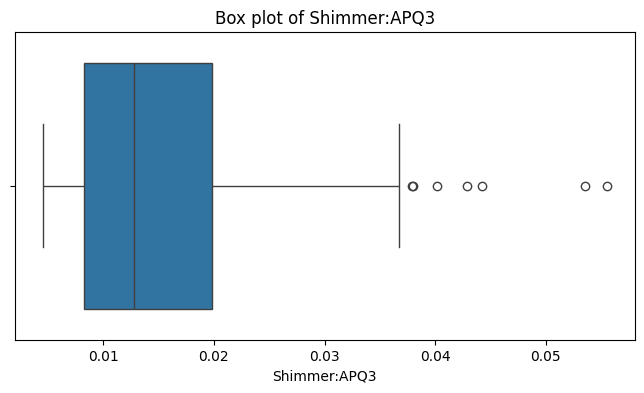

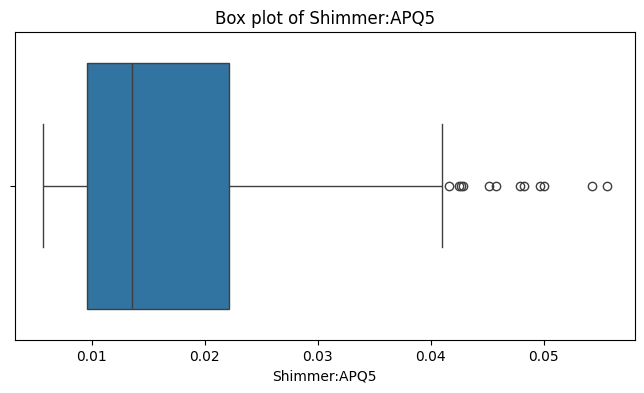

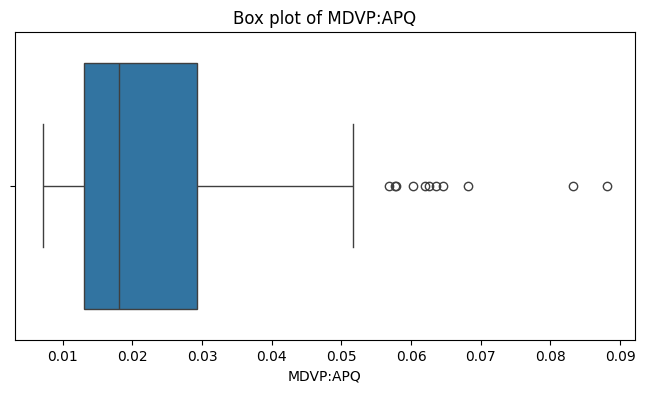

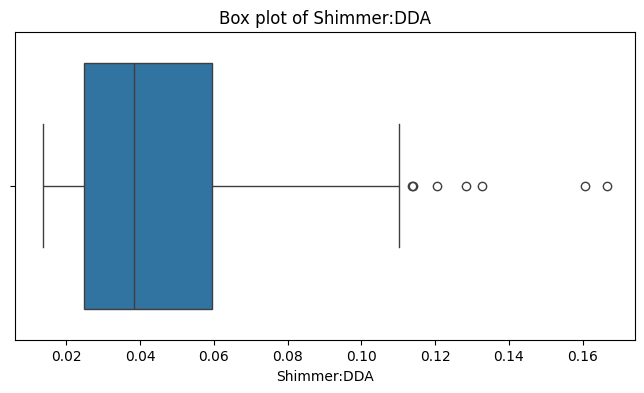

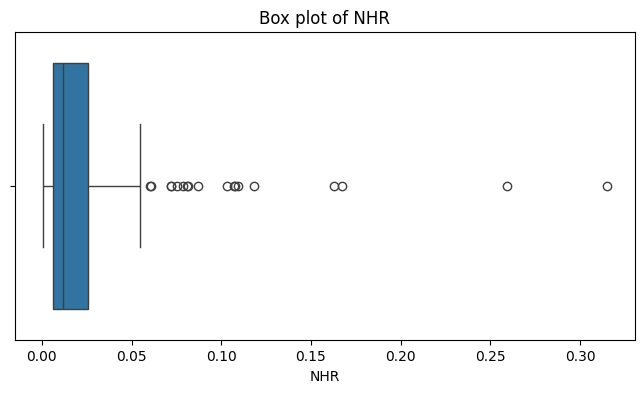

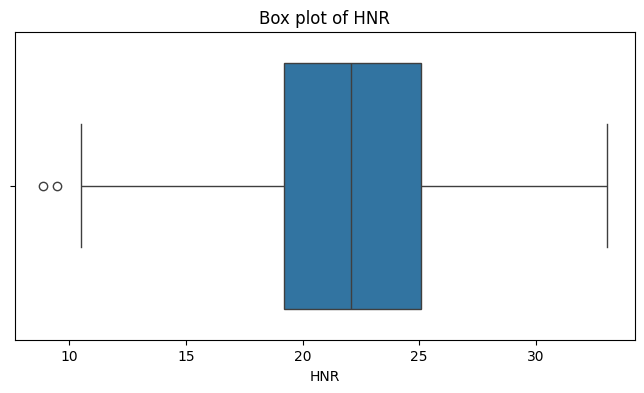

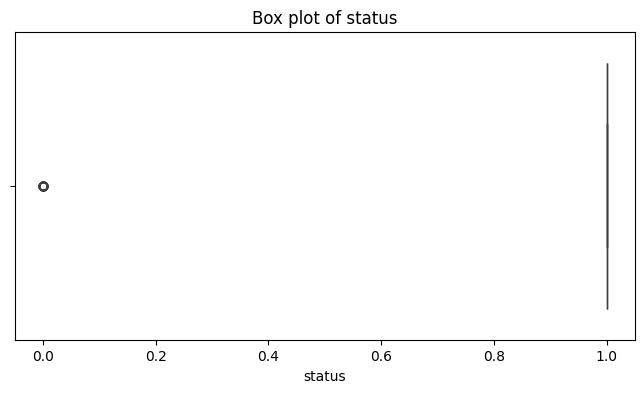

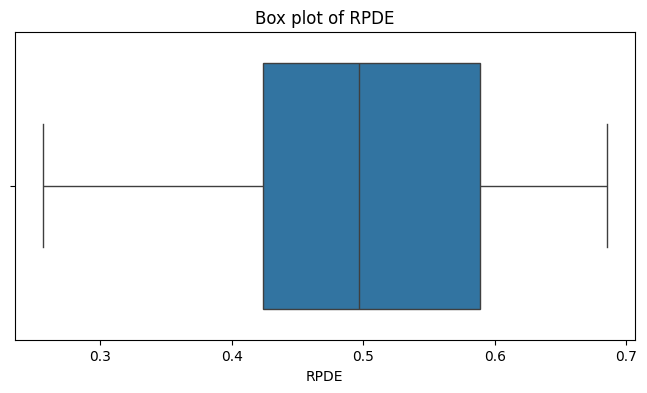

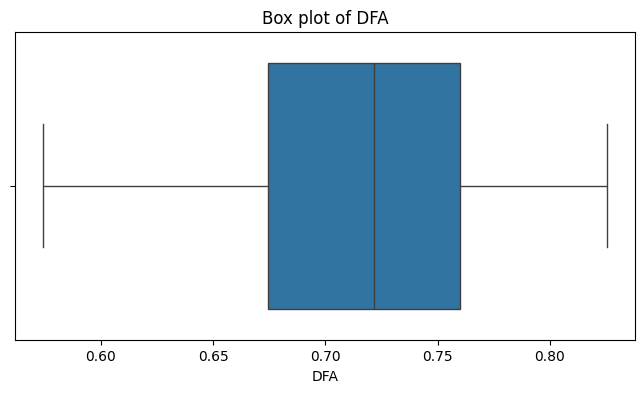

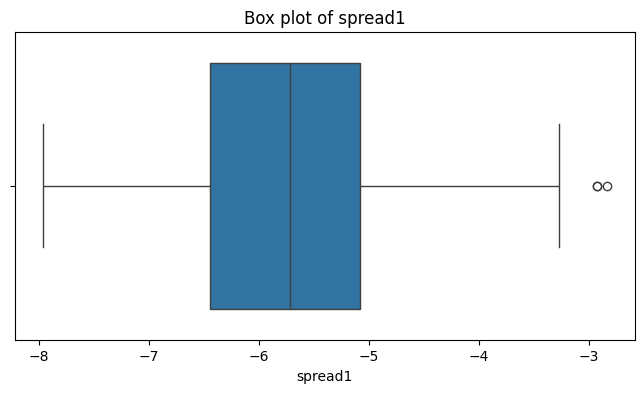

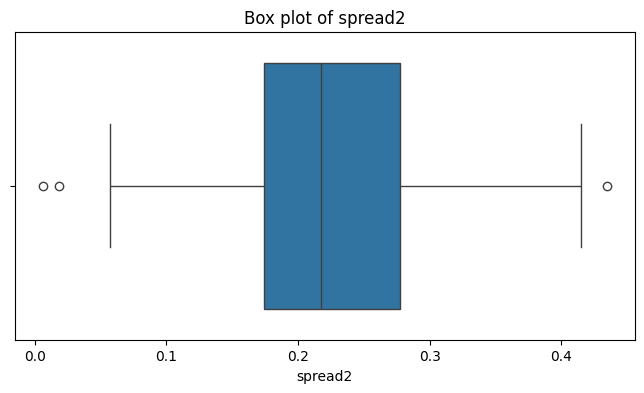

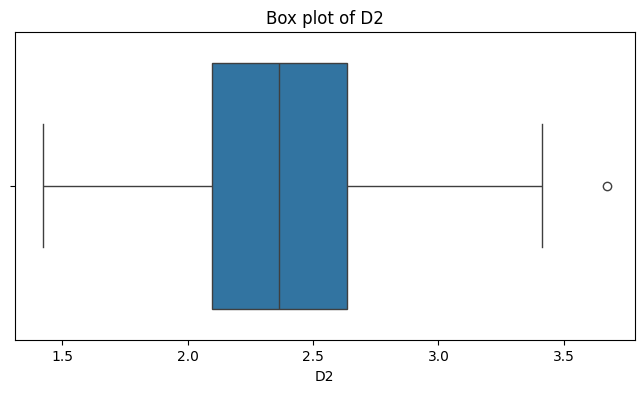

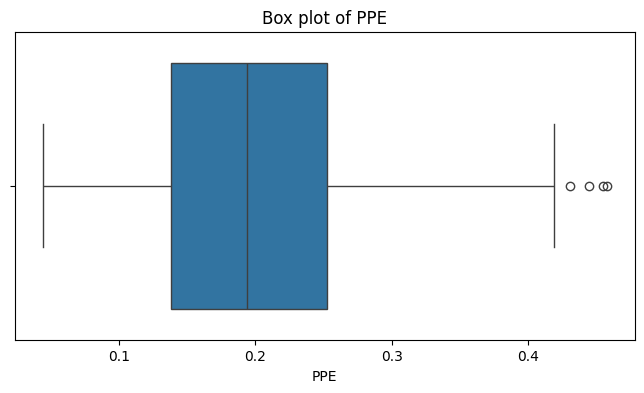

In [7]:
#detecting outliers


# Function to detect outliers in a DataFrame
def detect_outliers(parkinson_df):
    outlier_indices = [] #creating list to store the indices of detected outliers

    # Iterate over each column in the dataframe, including different types of dtypes 
    for col in parkinson_df.select_dtypes(include=['float64', 'int64']).columns:
        # 1st quartile
        Q1 = parkinson_df[col].quantile(0.25) #25th percentile
        # 3rd quartile
        Q3 = parkinson_df[col].quantile(0.75) #75th percentile
        # IQR, defining it as a variable 
        IQR = Q3 - Q1 

        # Outlier step
        outlier_step = 1.5 * IQR # -> will be used later on in boxplot to detect outliers

        # Determine a list of indices of outliers for feature col based on the conditions that make them outliers
        outlier_list_col = parkinson_df[(parkinson_df[col] < Q1 - outlier_step) | (parkinson_df[col] > Q3 + outlier_step)].index
        
        # Append the found outlier indices
        outlier_indices.extend(outlier_list_col)
    
    # Select observations containing more than 2 outliers
    outlier_indices = pd.Index(outlier_indices)
    multiple_outliers = outlier_indices.value_counts()
    multiple_outliers = multiple_outliers[multiple_outliers > 1].index

    return multiple_outliers

# Detect outliers
outliers = detect_outliers(parkinson_df)
print("Outliers detected at indices:", outliers)

# Plotting boxplots for each numerical feature
for column in parkinson_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=parkinson_df[column])
    plt.title(f'Box plot of {column}')
    plt.show()



In [8]:
#removing outliers from parkinson df 

parkinson_df = parkinson_df.drop(outliers)
parkinson_df 

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,DCAT
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,N
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,L
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,M
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,M
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,phon_R01_S49_6,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,...,0.00703,24.775,0,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777,Q
189,phon_R01_S50_1,201.774,262.707,78.228,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,...,0.04441,19.368,0,0.508479,0.683761,-6.934474,0.159890,2.316346,0.112838,L
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,L
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,L


In [9]:

# Normalize and standardize the data in the df

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from IPython.display import display


numerical_columns = parkinson_df.columns.difference(['name', 'status', 'DCAT'])  # Exclude some columns to standardize

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
parkinson_df[numerical_columns] = scaler.fit_transform(parkinson_df[numerical_columns])

# Display the standardized data
display(parkinson_df)





,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,DCAT
0,phon_R01_S01_1,-0.733256,-0.323268,-0.992070,1.283821,1.580774,0.852405,2.120318,0.849852,1.390435,...,0.652534,-0.478395,1,-0.826428,1.736193,1.076991,0.555163,-0.072804,1.231937,N
1,phon_R01_S01_2,-0.667482,-0.446009,0.158932,2.153646,2.078938,1.611625,3.233831,1.609436,2.768927,...,0.408388,-1.028758,1,-0.396986,1.817432,1.922335,1.491418,0.469289,2.435545,L
2,phon_R01_S01_3,-0.823669,-0.694823,0.091809,2.541286,2.577102,2.242976,3.900370,2.246420,2.063233,...,-0.128388,-0.586320,1,-0.677499,1.928034,1.500731,1.160624,0.046533,1.919263,M
3,phon_R01_S01_4,-0.823833,-0.598923,0.086205,2.290738,2.577102,1.907321,3.249514,1.905274,2.266091,...,-0.090294,-0.588298,1,-0.627495,1.811947,1.873862,1.471869,0.231589,2.439857,M
6,phon_R01_S02_1,-0.725745,-0.607818,0.188610,-0.848197,-0.411880,-0.865829,-0.639939,-0.863875,-0.775990,...,-0.736157,0.610184,1,0.959860,0.754779,0.136035,0.435943,-1.378696,0.187655,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,phon_R01_S49_6,-0.881550,-0.864265,-0.646668,-0.876561,-0.411880,-0.937755,-0.781089,-0.935836,-1.107298,...,-0.653043,0.578823,0,0.558397,-1.258565,-1.096624,-1.027048,-1.205598,-1.101317,Q
189,phon_R01_S50_1,1.500624,1.172044,-0.896277,0.858363,-0.411880,1.188060,0.881339,1.185668,-0.019386,...,2.583196,-0.948803,0,0.096946,-0.786221,-1.353554,-0.888915,-0.029229,-1.229371,L
190,phon_R01_S50_2,0.747111,0.721925,-0.420927,-0.252556,-0.411880,-0.002716,-0.192966,-0.000348,1.165647,...,1.131304,-0.906706,0,-0.494748,-1.282211,-0.899983,-1.402888,0.968134,-0.939829,L
191,phon_R01_S50_3,1.712097,1.034578,-0.562438,0.243812,-0.411880,0.540725,0.065808,0.543354,0.119246,...,0.305361,-1.011242,0,-0.659967,-0.796136,-0.506708,-1.303299,1.338965,-0.426340,L


#### Load and prepare dataset

In [10]:
#training all the columsn except for 'status', 'DCAT', 'name'

X = parkinson_df.drop(columns=['name', 'DCAT', 'status'])
y = parkinson_df['status']

#split the dataset into different training and testing sets: 

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42) #80% of the data is used for training
X_valid, X_test, y_valid, y_test = train_test_split(X_valid,y_valid, test_size=0.5, random_state=42)



### Build Decision Tree Model

#### Train the Decision Model Tree

In [11]:
#build the decision tree model 

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
#retrive the number of nodes and the depth of the tree

node_info = dt_model.tree_.node_count, dt_model.tree_.max_depth
print(f"The number of nodes and the depth of the tree are {node_info}")

#27 nodes and 6 layers

The number of nodes and the depth of the tree are (27, 6)


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#define a function that returns any errors:

def error(y_true, y_pred, label):
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name= label)



In [14]:
# The error on the training and test data sets
# Get the performance of the trained model on the training and test sets
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

train_test_error = pd.concat([error(y_train, y_train_pred, 'train'),
                              error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_error

,train,test
accuracy,1.0,0.687500
precision,1.0,0.769231
recall,1.0,0.833333
f1,1.0,0.800000


In [15]:


#making predictions with the decision tree model 

y_pred_dt = dt_model.predict(X_test)



In [16]:
#evaluate the decision tree model 

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

print(f"The decision tree accuracy is {dt_accuracy} \n")
print(f"The decison tree classification report is \n\n {dt_report}")

The decision tree accuracy is 0.6875 

The decison tree classification report is 

               precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.77      0.83      0.80        12

    accuracy                           0.69        16
   macro avg       0.55      0.54      0.54        16
weighted avg       0.66      0.69      0.67        16



In [17]:
#print out the confusion matrix: 

confusion_matrix = confusion_matrix(y_test_pred, y_test)

confusion_matrix

array([[ 1,  2],
       [ 3, 10]])

Text(0.5, 6.8833333333333275, 'Predicted')

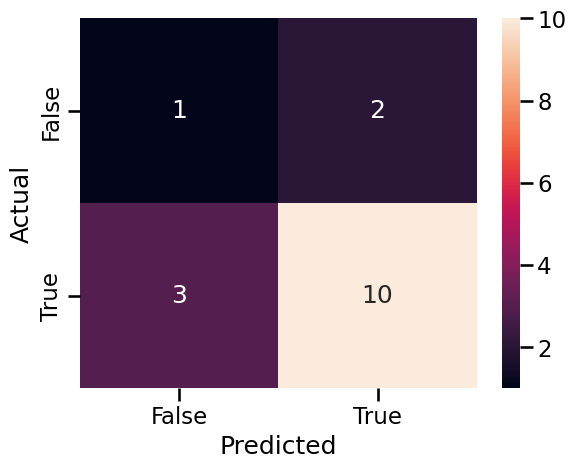

In [18]:
#map out the matrix 

sns.set_context('talk')
ax = sns.heatmap(confusion_matrix, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')



#### Regularisation

In [19]:
#search for the best layers 
from sklearn.model_selection import GridSearchCV

#create and search evaluation ranges 

parameter_grid = {'max_depth': range(1, dt_model.tree_.max_depth+1, 2),
                  'max_features': range(1, len(X_train.columns) +1 )}

gr_dt_model = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid=parameter_grid,
                           scoring='accuracy',
                           n_jobs=- 1)

gr_dt_model = gr_dt_model.fit(X_train, y_train)
gr_dt_model

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 7, 2),
                         'max_features': range(1, 23)},
             scoring='accuracy')

In [20]:
#retrieving the number of nodes and the depth 

gr_dt_model.best_estimator_.tree_.node_count, gr_dt_model.best_estimator_.tree_.max_depth 

#obtained a smaller tree --> (13,3) vs (27, smth)

(13, 3)

In [21]:

#get the best parameters 

gr_dt_model.best_params_

#only need one feature?

{'max_depth': 3, 'max_features': 1}

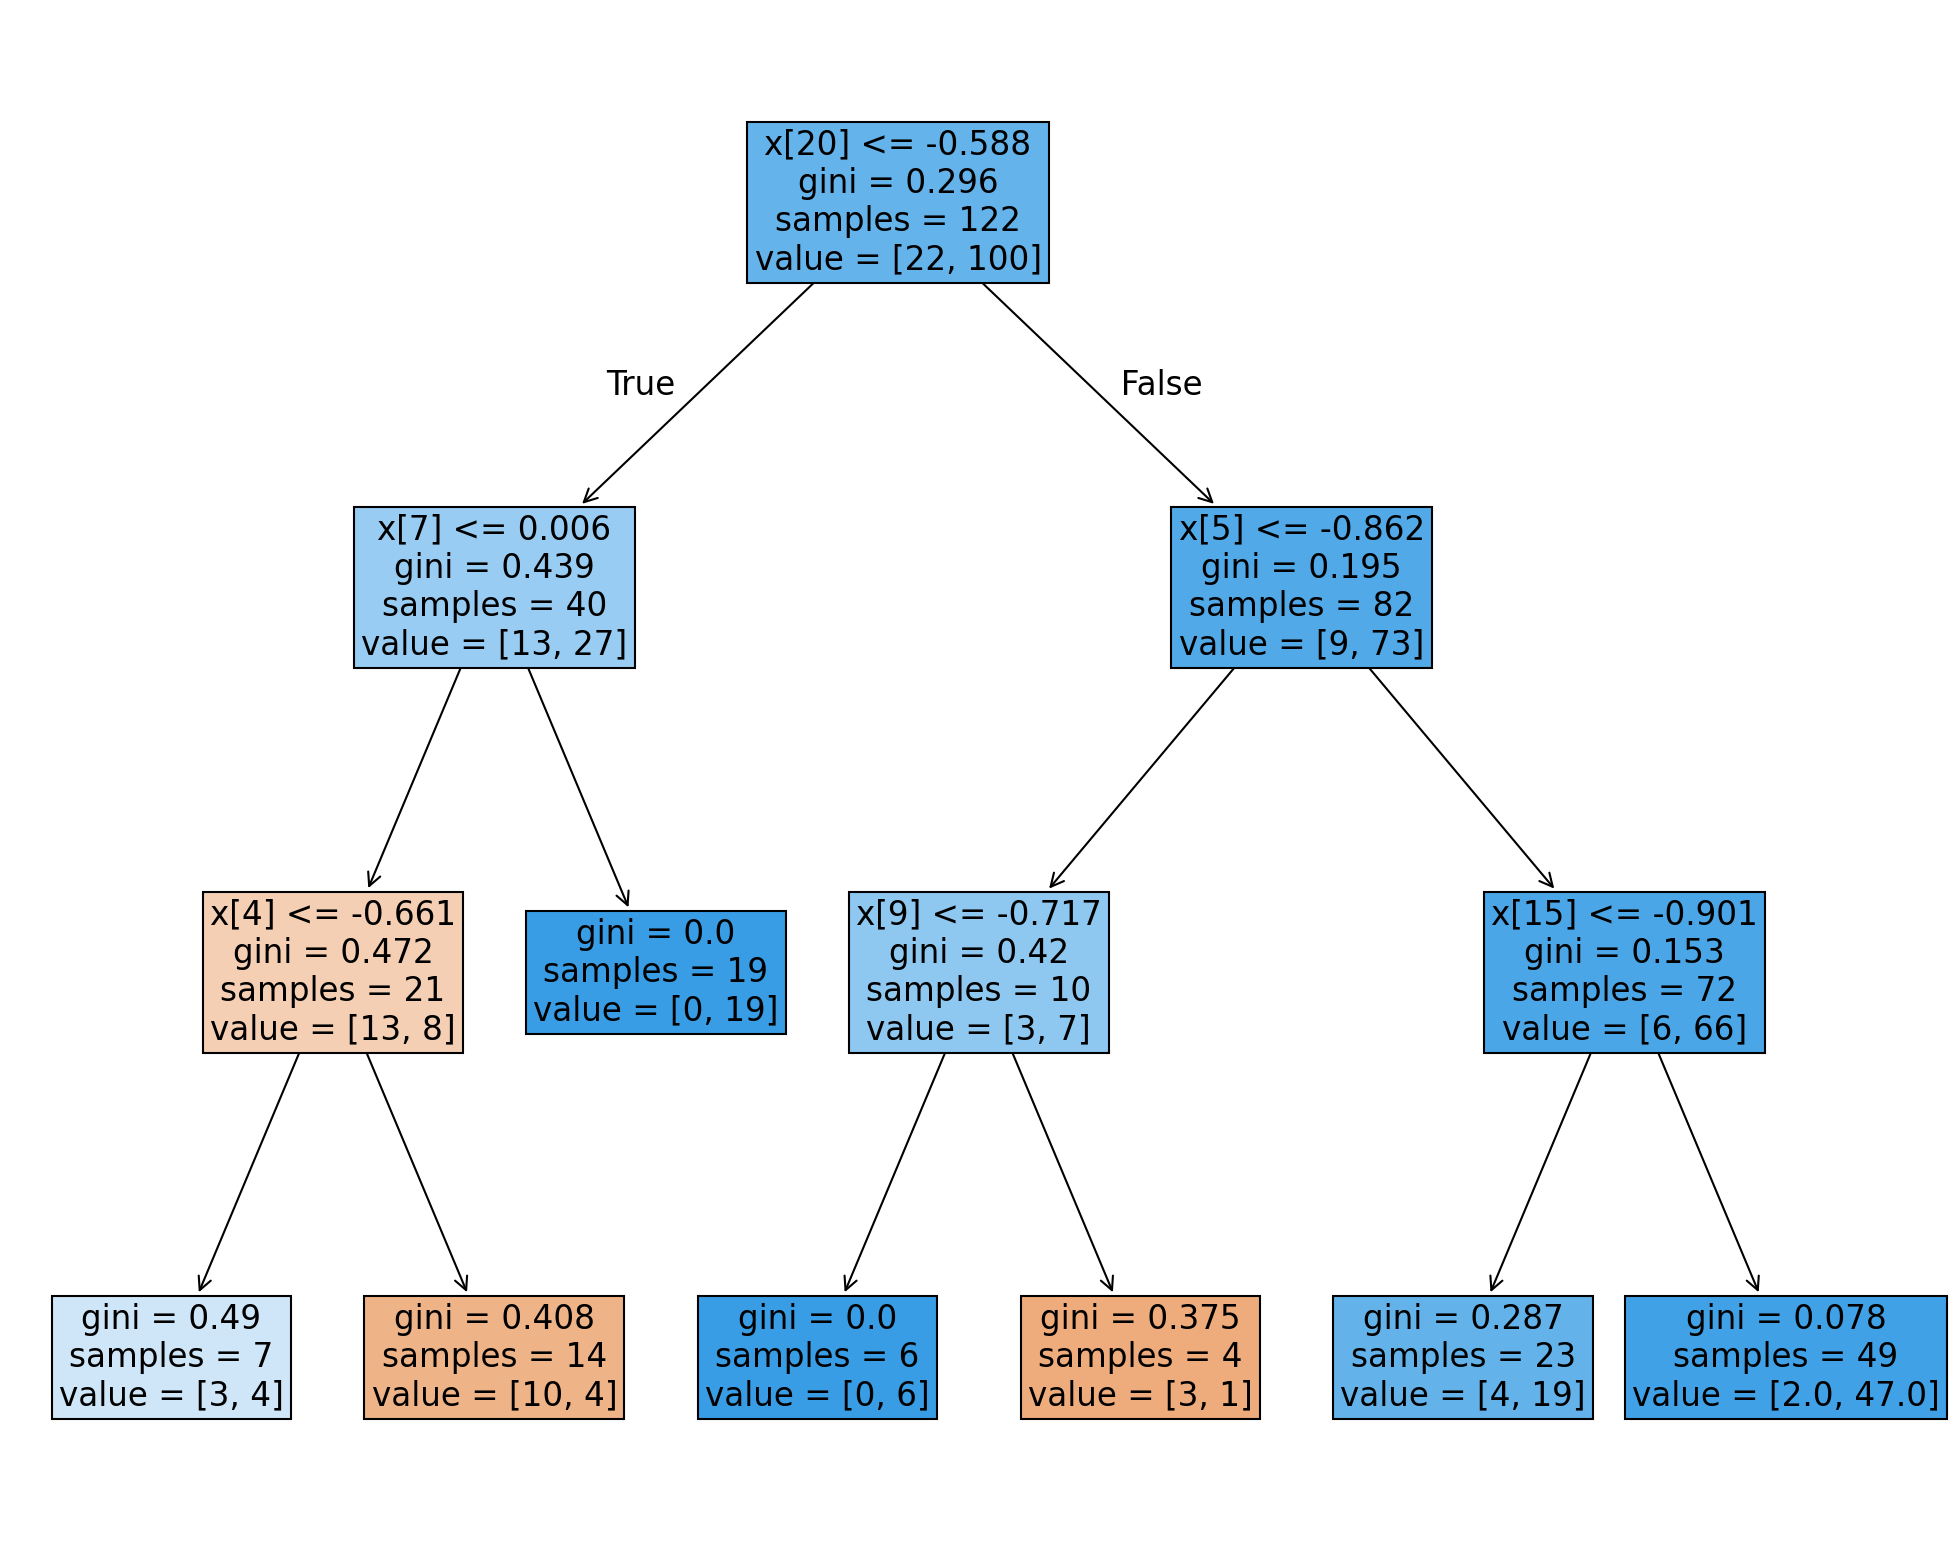

In [22]:
#plot the tree

plt.figure(figsize=(25,20))
plot_tree(gr_dt_model.best_estimator_, filled=True)
plt.show()

In [23]:
#X_train are in pandas dataframe requiring us to convert them to numpy arrays 
print("Type of X_test and X_train:\n")

print(type(X_train))
print(type(X_test))

#converting numpy arrays: 
X_train = np.array(X_train)
X_test = np.array(X_test)
print("\n")

print("new type of X_train and X_test:\n")
print(type(X_train))
print(type(X_test))


Type of X_test and X_train:

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


new type of X_train and X_test:

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
# from sklearn.preprocessing import binarize
# #convert to binary

# y_train_binary = binarize(y_train, threshold=0.5)
# y_test_binary = binarize(y_test, threshold=0.5)
# # get the performance metrics of the best tree 

# #convert to np.float32
# X_train = X_train.astype(np.float32)
# X_test = X_test.astype(np.float32)

# y_train_pred = gr_dt_model.best_estimator_.tree_.predict(X_train)

# y_test_pred = gr_dt_model.best_estimator_.tree_.predict(X_test)

# train_test_error = pd.concat([error(y_train, y_train_binary, 'train'),
#                             error(y_test, y_test_binary, 'test')],
#                             axis=1)
# train_test_error


In [25]:
from sklearn.preprocessing import binarize
# Convert to binary

y_train_binary = binarize(y_train.values.reshape(-1, 1), threshold=0.5)
y_test_binary = binarize(y_test.values.reshape(-1, 1), threshold=0.5)
# Get the performance metrics of the best tree

# Convert to np.float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

y_train_pred = gr_dt_model.best_estimator_.tree_.predict(X_train)
y_test_pred = gr_dt_model.best_estimator_.tree_.predict(X_test)

train_test_error = pd.concat([error(y_train, y_train_binary, 'train'),
                              error(y_test, y_test_binary, 'test')],
                             axis=1)
train_test_error

,train,test
accuracy,1.0,1.0
precision,1.0,1.0
recall,1.0,1.0
f1,1.0,1.0
